In [4]:
# ============================================
# STEP 1: JUST LOAD ONE .npz FILE
# ============================================
import os
import numpy as np

# Path to your FIRST subject's .npz file
base_path = r"D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2"
npz_file = os.path.join(base_path, "results", "33channel_labeled", "sub-01_33ch.npz")

print("STEP 1: Loading ONE .npz file...")
print(f"File: {npz_file}")

# Load it
data = np.load(npz_file, allow_pickle=True)

# ============================================
# STEP 2: SEE WHAT'S INSIDE (JUST LIST KEYS)
# ============================================
print("\nSTEP 2: What's in this file?")
print("-" * 40)

# Just show the keys (names of things in the file)
for key in data.files:
    print(f"Key: '{key}'")



print("first key: ", data.files[0])
# ============================================
# STEP 3: LOOK AT THE LABELS
# ============================================
print("\nSTEP 3: Looking at labels...")

# Get the labels
labels = data['labels']
print(f"Shape of labels: {labels.shape}")
print(f"Labels array: {labels}")

# Simple count
print(f"\nLeft hand (1): {np.sum(labels == 1)} trials")
print(f"Right hand (2): {np.sum(labels == 2)} trials")

# ============================================
# STEP 4: LOOK AT THE EEG DATA
# ============================================
print("\nSTEP 4: Looking at EEG data...")

# Get the EEG segments
segments = data['segments_eeg']
print(f"Shape of segments_eeg: {segments.shape}")

# What does this shape mean?
n_trials, n_channels, n_samples = segments.shape
print(f"\nInterpretation:")
print(f"- {n_trials} trials total")
print(f"- {n_channels} EEG channels per trial")
print(f"- {n_samples} time samples per trial")

# ============================================
# STEP 5: CHECK ONE TRIAL
# ============================================
print("\nSTEP 5: Checking one trial...")

# Look at trial 0
trial_0 = segments[0]  # First trial
print(f"Shape of trial 0: {trial_0.shape}")
print(f"Label for trial 0: {labels[0]}")

# ============================================
# STEP 6: CHECK CHANNEL NAMES
# ============================================
print("\nSTEP 6: Checking channel names...")

channels = data['channels_eeg']
print(f"Number of channels: {len(channels)}")
print(f"First 5 channels: {channels[:5]}")

# ============================================
# STEP 7: CHECK SAMPLING RATE
# ============================================
print("\nSTEP 7: Checking sampling rate...")

sampling_rate = data['sampling_rate']
print(f"Sampling rate: {sampling_rate} Hz")

# Calculate trial duration
duration = n_samples / sampling_rate
print(f"Each trial is {duration:.1f} seconds long")

print("\n✅ Done! We've loaded and checked ONE subject's data.")

STEP 1: Loading ONE .npz file...
File: D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2\results\33channel_labeled\sub-01_33ch.npz

STEP 2: What's in this file?
----------------------------------------
Key: 'segments_all'
Key: 'segments_eeg'
Key: 'labels'
Key: 'channels_all'
Key: 'channels_eeg'
Key: 'channels_eog'
Key: 'channels_marker'
Key: 'sampling_rate'
Key: 'subject_id'
Key: 'event_info'
first key:  segments_all

STEP 3: Looking at labels...
Shape of labels: (40,)
Labels array: [2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1]

Left hand (1): 20 trials
Right hand (2): 20 trials

STEP 4: Looking at EEG data...
Shape of segments_eeg: (40, 29, 2000)

Interpretation:
- 40 trials total
- 29 EEG channels per trial
- 2000 time samples per trial

STEP 5: Checking one trial...
Shape of trial 0: (29, 2000)
Label for trial 0: 2

STEP 6: Checking channel names...
Number of channels: 29
First 5 channels: ['FP1' 'FP2' 'Pz' 'P3' 'P4']

STEP 7: C

In [10]:
# Show ALL keys and their contents
for key in data.files: 
    print(f"{key}: {type(data[key])}, shape={data[key].shape if hasattr(data[key], 'shape') else 'N/A'}")

# Or just check the main ones:
print(f"labels: {data['labels']}")
print(f"segments_eeg shape: {data['segments_eeg'].shape}")
print(f"segments_eeg shape : {data['segments_eeg'].shape}")

segments_all: <class 'numpy.ndarray'>, shape=(40, 30, 2000)
segments_eeg: <class 'numpy.ndarray'>, shape=(40, 29, 2000)
labels: <class 'numpy.ndarray'>, shape=(40,)
channels_all: <class 'numpy.ndarray'>, shape=(30,)
channels_eeg: <class 'numpy.ndarray'>, shape=(29,)
channels_eog: <class 'numpy.ndarray'>, shape=(1,)
channels_marker: <class 'numpy.ndarray'>, shape=(0,)
sampling_rate: <class 'numpy.ndarray'>, shape=()
subject_id: <class 'numpy.ndarray'>, shape=()
event_info: <class 'numpy.ndarray'>, shape=(40,)
labels: [2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1]
segments_eeg shape: (40, 29, 2000)
segments_eeg shape : (40, 29, 2000)


In [13]:
print(f"segments_eeg trail 1 with its labels : {data['segments_eeg'][0]} and its label is {data['labels'][0]} and its shape is {data['segments_eeg'][0].shape}")

segments_eeg trail 1 with its labels : [[ 1.30007915e-05  1.45315243e-05  1.57869455e-05 ... -4.19514170e-05
  -4.12245942e-05 -4.04151779e-05]
 [ 4.63030889e-06  5.25110189e-06  5.26205706e-06 ... -5.15624124e-05
  -5.01784092e-05 -4.86702474e-05]
 [-4.07246254e-05 -4.07284634e-05 -4.06497855e-05 ...  1.54859337e-05
   1.52460620e-05  1.50560837e-05]
 ...
 [-3.03619419e-05 -3.17473571e-05 -3.28870411e-05 ...  1.73226088e-05
   1.67294646e-05  1.62380024e-05]
 [-5.43307949e-05 -5.88899709e-05 -6.19436690e-05 ...  1.01957931e-05
   1.00960611e-05  1.00248240e-05]
 [-1.97372722e-05 -2.13064662e-05 -2.26885788e-05 ...  1.46399133e-05
   1.36319638e-05  1.27500080e-05]] and its label is 2 and its shape is (29, 2000)


In [16]:
print(f"segments_eeg trail 1 with its labels : {data['segments_eeg'][0][1]} and its label is {data['labels'][0]} and its shape is {data['segments_eeg'][0][1].shape}")

segments_eeg trail 1 with its labels : [ 4.63030889e-06  5.25110189e-06  5.26205706e-06 ... -5.15624124e-05
 -5.01784092e-05 -4.86702474e-05] and its label is 2 and its shape is (2000,)


In [17]:
 #Get all data
segments = data['segments_eeg']  # List of 40 trials
labels = data['labels']          # Labels (1=left, 2=right)
channels = data['channels_eeg']  # Channel names

# 1. Find FIRST RIGHT HAND trial
right_hand_indices = np.where(labels == 2)[0]  # Get indices where label=2 (right)
first_right_idx = right_hand_indices[0]
first_right_trial = segments[first_right_idx]
print(f"First RIGHT hand trial: index {first_right_idx}, shape {first_right_trial.shape}")

First RIGHT hand trial: index 0, shape (29, 2000)


In [18]:
# 2. Find FIRST LEFT HAND trial
left_hand_indices = np.where(labels == 1)[0]    # Get indices where label=1 (left)
first_left_idx = left_hand_indices[0]
first_left_trial = segments[first_left_idx]
print(f"First LEFT hand trial: index {first_left_idx}, shape {first_left_trial.shape}")

First LEFT hand trial: index 1, shape (29, 2000)


In [20]:
# ============================================
# FIND SPECIFIC TRIALS AND CHANNELS
# ============================================

# Get all data
segments = data['segments_eeg']  # List of 40 trials
labels = data['labels']          # Labels (1=left, 2=right)
channels = data['channels_eeg']  # Channel names

# 1. Find FIRST RIGHT HAND trial
right_hand_indices = np.where(labels == 2)[0]  # Get indices where label=2 (right)
first_right_idx = right_hand_indices[0]
first_right_trial = segments[first_right_idx]
print(f"First RIGHT hand trial: index {first_right_idx}, shape {first_right_trial.shape}")

# 2. Find FIRST LEFT HAND trial
left_hand_indices = np.where(labels == 1)[0]    # Get indices where label=1 (left)
first_left_idx = left_hand_indices[0]
first_left_trial = segments[first_left_idx]
print(f"First LEFT hand trial: index {first_left_idx}, shape {first_left_trial.shape}")

# 3. Find C3 and C4 channel indices
c3_index = None
c4_index = None

for i, channel_name in enumerate(channels):
    if 'C3' in str(channel_name).upper():
        c3_index = i
        print(f"C3 channel found at index {i}: {channel_name}")
    if 'C4' in str(channel_name).upper():
        c4_index = i
        print(f"C4 channel found at index {i}: {channel_name}")

# 4. Get C3 and C4 data for both trials
if c3_index is not None and c4_index is not None:
    # Right hand trial
    c3_right = first_right_trial[c3_index]  # C3 data for right hand trial
    c4_right = first_right_trial[c4_index]  # C4 data for right hand trial
    
    # Left hand trial
    c3_left = first_left_trial[c3_index]    # C3 data for left hand trial
    c4_left = first_left_trial[c4_index]    # C4 data for left hand trial
    
    print(f"\nC3 Right hand: {c3_right[:5]}... (shape: {c3_right.shape})")
    print(f"C4 Right hand: {c4_right[:5]}... (shape: {c4_right.shape})")
    print(f"C3 Left hand: {c3_left[:5]}... (shape: {c3_left.shape})")
    print(f"C4 Left hand: {c4_left[:5]}... (shape: {c4_left.shape})")



    print(f"Real C3: {channels[12]}")
print(f"Real C4: {channels[13]}")

# Get the data
c3_right = first_right_trial[12]  # C3 for right hand
c4_right = first_right_trial[13]  # C4 for right hand
c3_left = first_left_trial[12]    # C3 for left hand  
c4_left = first_left_trial[13]    # C4 for left hand

First RIGHT hand trial: index 0, shape (29, 2000)
First LEFT hand trial: index 1, shape (29, 2000)
C3 channel found at index 7: FC3
C4 channel found at index 8: FC4
C3 channel found at index 12: C3
C4 channel found at index 13: C4

C3 Right hand: [2.30456417e-06 2.25422671e-06 2.22253276e-06 2.27473456e-06
 2.44811915e-06]... (shape: (2000,))
C4 Right hand: [1.70403400e-05 1.71259907e-05 1.69523743e-05 1.65796778e-05
 1.61028115e-05]... (shape: (2000,))
C3 Left hand: [-2.67325126e-06 -2.57071199e-06 -2.67884431e-06 -2.94358206e-06
 -3.30340167e-06]... (shape: (2000,))
C4 Left hand: [-3.44755129e-06 -4.55059407e-06 -5.16172376e-06 -5.25547661e-06
 -4.90940127e-06]... (shape: (2000,))
Real C3: C3
Real C4: C4


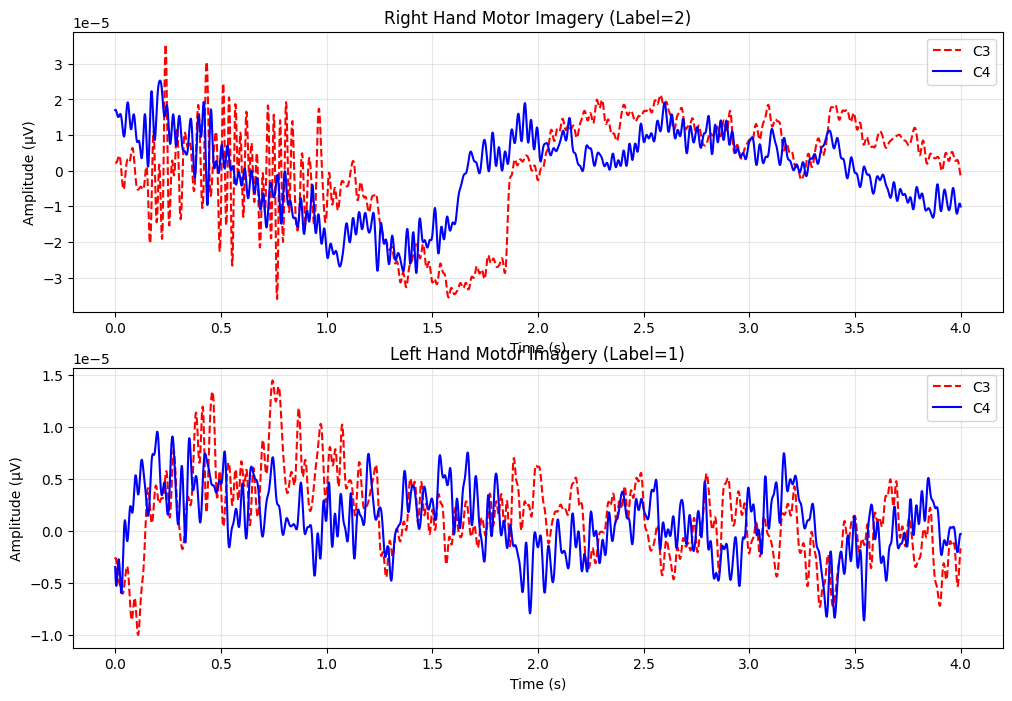

In [29]:
import matplotlib.pyplot as plt

# Get the data
segments = np.array(data['segments_eeg'])  # Convert to 3D array (40, 29, 2000)
labels = data['labels']
channels = data['channels_eeg']

# Time axis (4 seconds at 500Hz)
time = np.linspace(0, 4, 2000)

# Find indices
right_idx = np.where(labels == 2)[0][0]  # First right hand
left_idx = np.where(labels == 1)[0][0]   # First left hand
c3_idx = 12  # Real C3
c4_idx = 13  # Real C4

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot RIGHT HAND trial
ax1.plot(time, segments[right_idx, c3_idx], 'r--', label='C3', linewidth=1.5)
ax1.plot(time, segments[right_idx, c4_idx], 'b-', label='C4', linewidth=1.5)
ax1.set_title('Right Hand Motor Imagery (Label=2)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (μV)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot LEFT HAND trial  
ax2.plot(time, segments[left_idx, c3_idx], 'r--', label='C3', linewidth=1.5)
ax2.plot(time, segments[left_idx, c4_idx], 'b-', label='C4', linewidth=1.5)
ax2.set_title('Left Hand Motor Imagery (Label=1)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (μV)')
ax2.legend()
ax2.grid(True, alpha=0.3)

#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Filtering to 8-30 Hz...


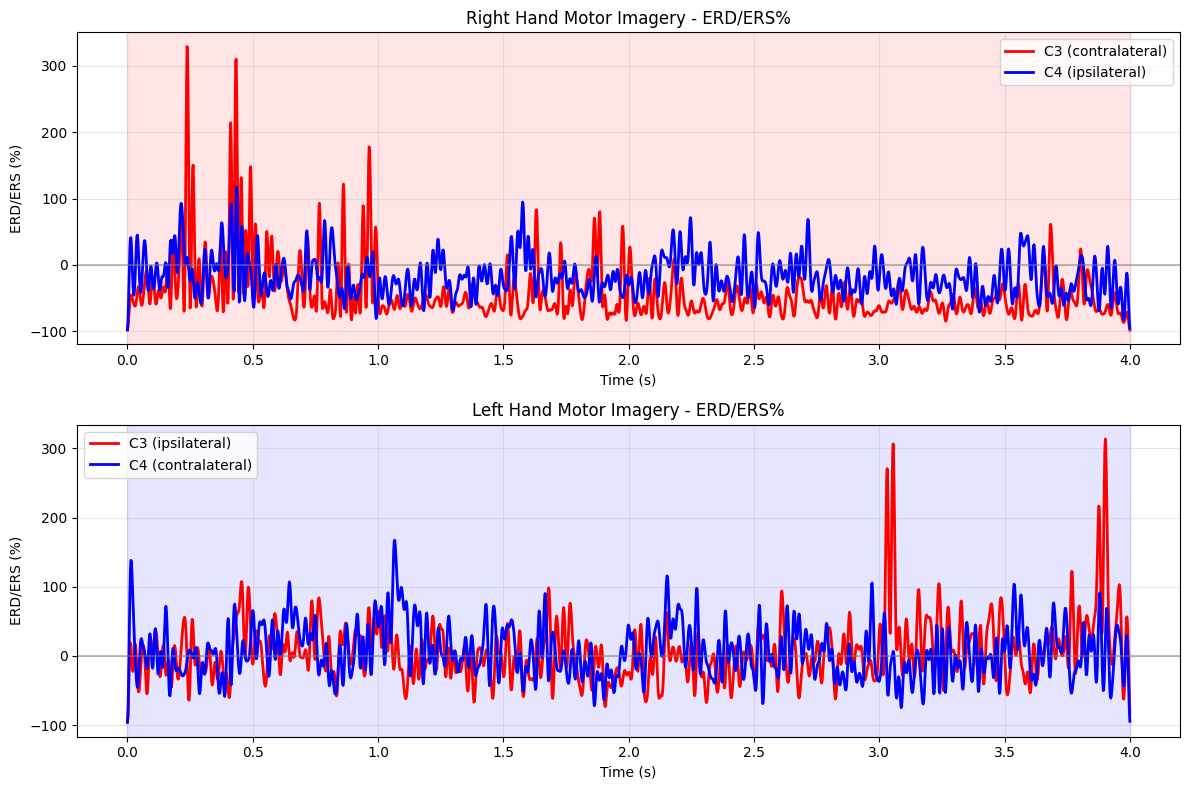


ERD/ERS Interpretation:
----------------------------------------
ERD (Event-Related Desynchronization): NEGATIVE values
  • Power DECREASE during motor imagery
  • Happens in CONTRALATERAL hemisphere
ERS (Event-Related Synchronization): POSITIVE values
  • Power INCREASE during motor imagery
  • Happens in IPSILATERAL hemisphere

Expected pattern:
Right hand MI: C3 (left hemisphere) should show ERD (negative)
Left hand MI: C4 (right hemisphere) should show ERD (negative)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ============================================
# SIMPLE ERD/ERS CALCULATION
# ============================================

# Your data
segments = np.array(data['segments_eeg'])  # (40, 29, 2000)
labels = data['labels']
fs = 500
time = np.linspace(0, 4, 2000)

# Channels
c3_idx = 12  # C3
c4_idx = 13  # C4

# ============================================
# STEP 1: Filter to 8-30 Hz (Motor Imagery band)
# ============================================
print("Filtering to 8-30 Hz...")
b, a = signal.butter(4, [8/(fs/2), 30/(fs/2)], btype='band')

# Apply filter to all trials
filtered_trials = np.zeros_like(segments)
for i in range(segments.shape[0]):
    filtered_trials[i] = signal.filtfilt(b, a, segments[i], axis=1)

# ============================================
# STEP 2: Calculate power (squared amplitude)
# ============================================
power = filtered_trials**2  # Shape: (40, 29, 2000)

# ============================================
# STEP 3: Separate by condition
# ============================================
right_power = power[labels == 2]  # Right hand trials
left_power = power[labels == 1]   # Left hand trials

# Average across trials
right_avg = np.mean(right_power, axis=0)  # Shape: (29, 2000)
left_avg = np.mean(left_power, axis=0)    # Shape: (29, 2000)

# ============================================
# STEP 4: Calculate ERD/ERS percentage
# ============================================
# Baseline period: first 0.5 seconds (0-0.5s) = samples 0-250
baseline_start, baseline_end = 0, 250

# Baseline mean power
right_baseline = np.mean(right_avg[:, baseline_start:baseline_end], axis=1, keepdims=True)
left_baseline = np.mean(left_avg[:, baseline_start:baseline_end], axis=1, keepdims=True)

# ERD/ERS percentage: (power - baseline) / baseline × 100
right_erd = (right_avg - right_baseline) / right_baseline * 100
left_erd = (left_avg - left_baseline) / left_baseline * 100

# ============================================
# STEP 5: Plot like paper Figure 4
# ============================================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Right Hand MI (C3 should show ERD - negative)
ax1.plot(time, right_erd[c3_idx], 'r-', linewidth=2, label='C3 (contralateral)')
ax1.plot(time, right_erd[c4_idx], 'b-', linewidth=2, label='C4 (ipsilateral)')
ax1.set_title('Right Hand Motor Imagery - ERD/ERS%')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('ERD/ERS (%)')
ax1.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax1.axvspan(0, 4, alpha=0.1, color='red')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Left Hand MI (C4 should show ERD - negative)
ax2.plot(time, left_erd[c3_idx], 'r-', linewidth=2, label='C3 (ipsilateral)')
ax2.plot(time, left_erd[c4_idx], 'b-', linewidth=2, label='C4 (contralateral)')
ax2.set_title('Left Hand Motor Imagery - ERD/ERS%')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('ERD/ERS (%)')
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax2.axvspan(0, 4, alpha=0.1, color='blue')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# STEP 6: Print what ERD/ERS means
# ============================================
print("\nERD/ERS Interpretation:")
print("-" * 40)
print("ERD (Event-Related Desynchronization): NEGATIVE values")
print("  • Power DECREASE during motor imagery")
print("  • Happens in CONTRALATERAL hemisphere")
print("ERS (Event-Related Synchronization): POSITIVE values")
print("  • Power INCREASE during motor imagery")
print("  • Happens in IPSILATERAL hemisphere")

print("\nExpected pattern:")
print("Right hand MI: C3 (left hemisphere) should show ERD (negative)")
print("Left hand MI: C4 (right hemisphere) should show ERD (negative)")

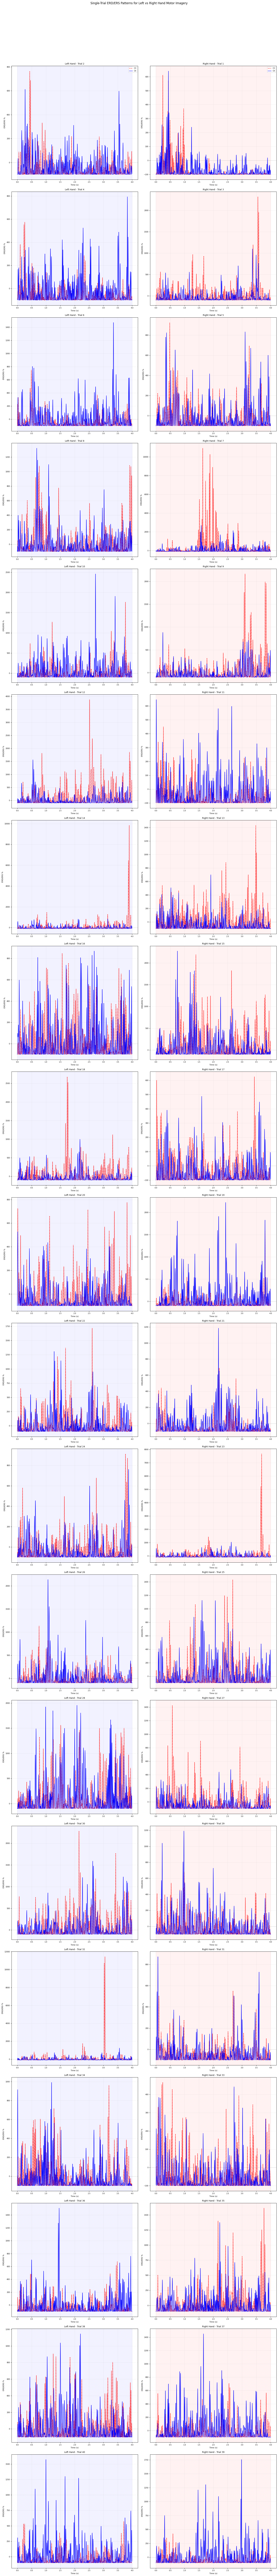

ERD/ERS Summary Statistics:
----------------------------------------

Right Hand MI (mean ± std):
  C3 (contralateral): 25.4 ± 166.7%
  C4 (ipsilateral): 12.9 ± 63.2%

Left Hand MI (mean ± std):
  C3 (ipsilateral): 19.1 ± 66.7%
  C4 (contralateral): 23.5 ± 59.3%


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ============================================
# SETUP
# ============================================
segments = np.array(data['segments_eeg'])  # (40, 29, 2000)
labels = data['labels']
fs = 500
time = np.linspace(0, 4, 2000)

c3_idx = 12  # C3
c4_idx = 13  # C4

# ============================================
# CALCULATION FUNCTION
# ============================================
def calculate_single_trial_erd(trial_data, fs=500):
    """Calculate ERD/ERS for one trial"""
    # Filter to 8-30 Hz
    b, a = signal.butter(4, [8/(fs/2), 30/(fs/2)], btype='band')
    filtered = signal.filtfilt(b, a, trial_data, axis=0)
    
    # Calculate power
    power = filtered**2
    
    # Baseline: first 0.5s (samples 0-250)
    baseline_power = np.mean(power[:250], axis=0)
    
    # ERD/ERS percentage
    erd = np.zeros_like(power)
    for i in range(power.shape[1]):
        erd[:, i] = (power[:, i] - baseline_power[i]) / baseline_power[i] * 100
    
    return erd

# ============================================
# PLOT ALL TRIALS
# ============================================

# Separate left and right trials
right_indices = np.where(labels == 2)[0]
left_indices = np.where(labels == 1)[0]

# Create figure - optimized size
fig = plt.figure(figsize=(16, 150))

# Plot configuration
n_rows = max(len(right_indices), len(left_indices))
n_cols = 2  # Left and right columns

# Plot LEFT HAND trials (left column)
for i, trial_idx in enumerate(left_indices):
    ax = plt.subplot(n_rows, 2, i*2 + 1)
    
    # Calculate ERD
    erd = calculate_single_trial_erd(segments[trial_idx].T)  # Transpose to (samples, channels)
    
    # Plot C3 and C4
    ax.plot(time, erd[:, c3_idx], 'r--', linewidth=1.2, label='C3')
    ax.plot(time, erd[:, c4_idx], 'b-', linewidth=1.2, label='C4')
    
    # Formatting
    ax.set_title(f'Left Hand - Trial {trial_idx+1}', fontsize=9)
    ax.set_xlabel('Time (s)', fontsize=8)
    ax.set_ylabel('ERD/ERS %', fontsize=8)
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.8)
    ax.axvspan(0, 4, alpha=0.05, color='blue')
    ax.grid(True, alpha=0.2)
    ax.tick_params(labelsize=7)
    
    # Only show legend on first plot
    if i == 0:
        ax.legend(fontsize=7, loc='upper right')

# Plot RIGHT HAND trials (right column)
for i, trial_idx in enumerate(right_indices):
    ax = plt.subplot(n_rows, 2, i*2 + 2)
    
    # Calculate ERD
    erd = calculate_single_trial_erd(segments[trial_idx].T)
    
    # Plot C3 and C4
    ax.plot(time, erd[:, c3_idx], 'r--', linewidth=1.2, label='C3')
    ax.plot(time, erd[:, c4_idx], 'b-', linewidth=1.2, label='C4')
    
    # Formatting
    ax.set_title(f'Right Hand - Trial {trial_idx+1}', fontsize=9)
    ax.set_xlabel('Time (s)', fontsize=8)
    ax.set_ylabel('ERD/ERS %', fontsize=8)
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.8)
    ax.axvspan(0, 4, alpha=0.05, color='red')
    ax.grid(True, alpha=0.2)
    ax.tick_params(labelsize=7)
    
    # Only show legend on first plot
    if i == 0:
        ax.legend(fontsize=7, loc='upper right')

plt.suptitle('Single-Trial ERD/ERS Patterns for Left vs Right Hand Motor Imagery', 
             fontsize=12, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for suptitle
plt.show()

# ============================================
# SUMMARY STATISTICS
# ============================================
print("ERD/ERS Summary Statistics:")
print("-" * 40)

# Calculate average ERD for each condition
right_erd_vals = []
left_erd_vals = []

for trial_idx in right_indices:
    erd = calculate_single_trial_erd(segments[trial_idx].T)
    right_erd_vals.append(np.mean(erd[500:1500, [c3_idx, c4_idx]], axis=0))  # Average during MI

for trial_idx in left_indices:
    erd = calculate_single_trial_erd(segments[trial_idx].T)
    left_erd_vals.append(np.mean(erd[500:1500, [c3_idx, c4_idx]], axis=0))

right_erd_vals = np.array(right_erd_vals)
left_erd_vals = np.array(left_erd_vals)

print("\nRight Hand MI (mean ± std):")
print(f"  C3 (contralateral): {right_erd_vals[:, 0].mean():.1f} ± {right_erd_vals[:, 0].std():.1f}%")
print(f"  C4 (ipsilateral): {right_erd_vals[:, 1].mean():.1f} ± {right_erd_vals[:, 1].std():.1f}%")

print("\nLeft Hand MI (mean ± std):")
print(f"  C3 (ipsilateral): {left_erd_vals[:, 0].mean():.1f} ± {left_erd_vals[:, 0].std():.1f}%")
print(f"  C4 (contralateral): {left_erd_vals[:, 1].mean():.1f} ± {left_erd_vals[:, 1].std():.1f}%")

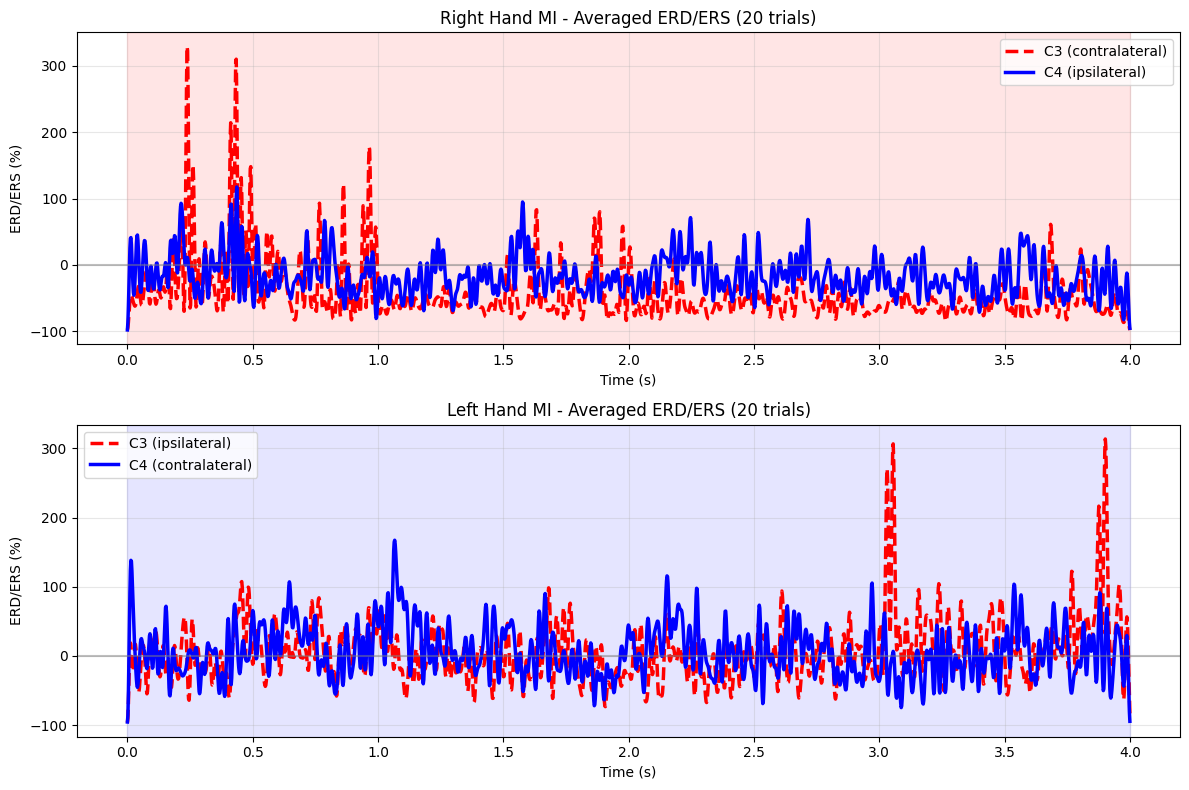

✅ Now you should see SMOOTH curves like the paper!
   • Averaged across 20 trials for each condition
   • C3 shows ERD for Right hand (should go negative)
   • C4 shows ERD for Left hand (should go negative)


In [35]:
# ============================================
# PLOT AVERAGED ERD/ERS LIKE PAPER FIGURE 4
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

segments = np.array(data['segments_eeg'])
labels = data['labels']
fs = 500
time = np.linspace(0, 4, 2000)

c3_idx = 12
c4_idx = 13

# ============================================
# STEP 1: Filter ALL trials to 8-30 Hz
# ============================================
b, a = signal.butter(4, [8/(fs/2), 30/(fs/2)], btype='band')
filtered_all = np.array([signal.filtfilt(b, a, trial, axis=1) for trial in segments])

# ============================================
# STEP 2: Calculate power for ALL trials
# ============================================
power_all = filtered_all**2  # Shape: (40, 29, 2000)

# ============================================
# STEP 3: Separate by condition and AVERAGE
# ============================================
right_power = power_all[labels == 2]  # Shape: (20, 29, 2000)
left_power = power_all[labels == 1]   # Shape: (20, 29, 2000)

# AVERAGE across trials (this smooths the curve!)
right_avg_power = np.mean(right_power, axis=0)  # Shape: (29, 2000)
left_avg_power = np.mean(left_power, axis=0)    # Shape: (29, 2000)

# ============================================
# STEP 4: Calculate ERD/ERS on AVERAGED data
# ============================================
def calculate_averaged_erd(averaged_power, baseline_range=(0, 250)):
    """Calculate ERD/ERS on already averaged power"""
    baseline = np.mean(averaged_power[:, baseline_range[0]:baseline_range[1]], axis=1, keepdims=True)
    erd = (averaged_power - baseline) / baseline * 100
    return erd

right_erd = calculate_averaged_erd(right_avg_power)
left_erd = calculate_averaged_erd(left_avg_power)

# ============================================
# STEP 5: Plot SMOOTH curves like paper
# ============================================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Right Hand (averaged across 20 trials)
ax1.plot(time, right_erd[c3_idx], 'r--', linewidth=2.5, label='C3 (contralateral)')
ax1.plot(time, right_erd[c4_idx], 'b-', linewidth=2.5, label='C4 (ipsilateral)')
ax1.set_title('Right Hand MI - Averaged ERD/ERS (20 trials)', fontsize=12)
ax1.set_xlabel('Time (s)', fontsize=10)
ax1.set_ylabel('ERD/ERS (%)', fontsize=10)
ax1.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax1.axvspan(0, 4, alpha=0.1, color='red')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Left Hand (averaged across 20 trials)
ax2.plot(time, left_erd[c3_idx], 'r--', linewidth=2.5, label='C3 (ipsilateral)')
ax2.plot(time, left_erd[c4_idx], 'b-', linewidth=2.5, label='C4 (contralateral)')
ax2.set_title('Left Hand MI - Averaged ERD/ERS (20 trials)', fontsize=12)
ax2.set_xlabel('Time (s)', fontsize=10)
ax2.set_ylabel('ERD/ERS (%)', fontsize=10)
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax2.axvspan(0, 4, alpha=0.1, color='blue')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Now you should see SMOOTH curves like the paper!")
print("   • Averaged across 20 trials for each condition")
print("   • C3 shows ERD for Right hand (should go negative)")
print("   • C4 shows ERD for Left hand (should go negative)")

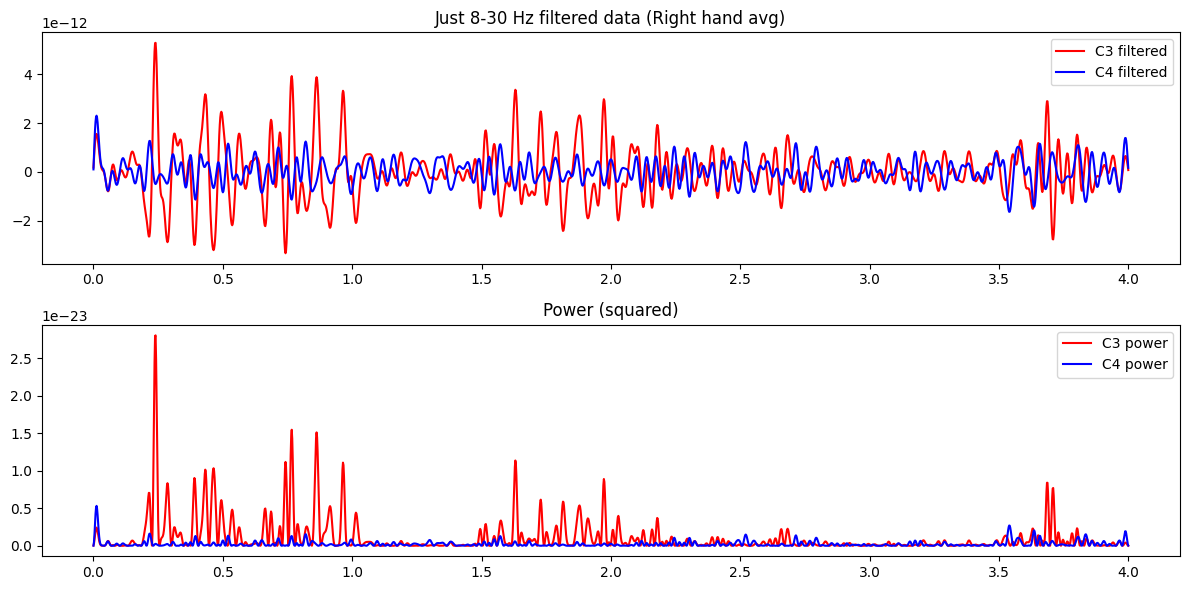

In [36]:
# Just plot the 8-30 Hz filtered data directly
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Filter to 8-30 Hz
b, a = signal.butter(4, [8/(fs/2), 30/(fs/2)], btype='band')
filtered_c3_right = signal.filtfilt(b, a, right_avg_power[c3_idx])
filtered_c4_right = signal.filtfilt(b, a, right_avg_power[c4_idx])

axes[0].plot(time, filtered_c3_right, 'r-', label='C3 filtered')
axes[0].plot(time, filtered_c4_right, 'b-', label='C4 filtered')
axes[0].set_title('Just 8-30 Hz filtered data (Right hand avg)')
axes[0].legend()

# Look at the power
power_c3 = filtered_c3_right**2
power_c4 = filtered_c4_right**2

axes[1].plot(time, power_c3, 'r-', label='C3 power')
axes[1].plot(time, power_c4, 'b-', label='C4 power')
axes[1].set_title('Power (squared)')
axes[1].legend()

plt.tight_layout()
plt.show()